# Global Product Inventory Exploratory Data Analysis
Project Goal: Uncovers trends in product inventory, pricing, demand indicators, and potential inefficiencies in stock management. 

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

# Data Source
The dataset used for this analysis is the "Global Product Inventory" available on Kaggle:

[https://www.kaggle.com/datasets/keyushnisar/global-product-inventory-dataset-2025](https://www.kaggle.com/datasets/keyushnisar/global-product-inventory-dataset-2025)

# Load Dataset
Data Cleaning & Preprocessing

In [14]:
 df = pd.read_csv("Global_Product_Inventory.csv", sep=';')

In [31]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product ID             10000 non-null  object        
 1   Product Name           10000 non-null  object        
 2   Product Category       10000 non-null  object        
 3   Price                  10000 non-null  float64       
 4   Stock Quantity         10000 non-null  int64         
 5   Warranty Period        10000 non-null  int64         
 6   Manufacturing Date     10000 non-null  datetime64[ns]
 7   Expiration Date        10000 non-null  datetime64[ns]
 8   Product Tags           10000 non-null  object        
 9   Color/Size Variations  10000 non-null  object        
 10  Product Ratings        10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 859.5+ KB


In [27]:
df['Manufacturing Date'] = pd.to_datetime(df['Manufacturing Date'], errors='coerce')

In [29]:
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce') 

In [33]:
df

,Product ID,Product Name,Product Category,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Product Tags,Color/Size Variations,Product Ratings
0,93TGNAY7,Laptop,Home Appliances,253.17,3,2,2025-01-01,2028-01-01,"VNU,NZ6",Green/Large,2
1,TYYZ5AV7,Smartphone,Clothing,214.37,92,2,2025-03-15,2027-01-01,"ZJA,0D3",Red/Small,2
2,5C94FGTQ,Headphones,Clothing,475.29,19,2,2025-03-15,2028-01-01,"ZNG,MAP",Red/Small,1
3,XBHKYPQB,Monitor,Clothing,403.33,40,1,2025-01-01,2028-01-01,"RPP,M40",Green/Large,1
4,728GCZFU,Laptop,Home Appliances,229.81,32,2,2025-07-30,2028-01-01,"R8U,X46",Blue/Medium,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,J29B6RDI,Headphones,Clothing,21.48,91,3,2025-03-15,2028-01-01,"M81,8WN",Blue/Medium,1
9996,L1HL7437,Laptop,Clothing,403.92,19,2,2025-01-01,2026-01-01,"0UM,L4B",Red/Small,4
9997,FD57S4E1,Laptop,Home Appliances,484.46,13,2,2025-01-01,2026-01-01,"GO4,EZE",Red/Small,1
9998,RPYLOB1M,Headphones,Clothing,411.63,79,1,2025-07-30,2028-01-01,"0QB,U55",Red/Small,1


In [21]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum() 

Product ID               0
Product Name             0
Product Category         0
Price                    0
Stock Quantity           0
Warranty Period          0
Manufacturing Date       0
Expiration Date          0
Product Tags             0
Color/Size Variations    0
Product Ratings          0
dtype: int64

# Global Product Inventory EDA

# Which products are at risk of stock depletion soon?

In [43]:
at_risk_stock = df[df['Stock Quantity'] < 3]
print("Products at risk of stock depletion soon:")
print(at_risk_stock[['Product ID', 'Product Name', 'Stock Quantity']]) 

Products at risk of stock depletion soon:
     Product ID Product Name  Stock Quantity
65     9Y137KWW       Laptop               2
159    XK9BCTZ6       Laptop               1
175    VY3371EV       Laptop               2
212    8D2OO0QB   Smartphone               1
232    LMDVKH9K   Headphones               1
...         ...          ...             ...
9455   5X0WALYB   Headphones               1
9631   7HL3Z91Z       Laptop               1
9744   VW2WBS6N       Laptop               2
9839   HK97ADGD      Monitor               2
9956   AUP5BLIW       Laptop               2

[180 rows x 3 columns]


# What’s the average shelf life per product category?
Shelf life is calculated as the difference between 'Expiration Date' and 'Manufacturing Date'

In [45]:
df['Shelf Life'] = (df['Expiration Date'] - df['Manufacturing Date']).dt.days
avg_shelf_life_per_category = df.groupby('Product Category')['Shelf Life'].mean()
print("Average shelf life per product category:")
print(avg_shelf_life_per_category) 

Average shelf life per product category:
Product Category
Clothing           643.462137
Electronics        638.030646
Home Appliances    635.659491
Name: Shelf Life, dtype: float64


# Which products are nearing expiration?
(within the next 12 months)  

In [58]:
twelve_months = current_date + pd.DateOffset(months=12)
nearing_expiration = df[df['Expiration Date'] <= twelve_months]
print("Products nearing expiration within the next 12 months:")
print(nearing_expiration[['Product ID', 'Product Name', 'Expiration Date']]) 


Products nearing expiration within the next 12 months:
     Product ID Product Name Expiration Date
5      27R9M103   Smartphone      2026-01-01
10     SX7HALUU      Monitor      2026-01-01
11     1AOXE5QW   Headphones      2026-01-01
13     X2D1GWO5      Monitor      2026-01-01
15     EPKS7ECS   Smartphone      2026-01-01
...         ...          ...             ...
9986   SPRX137X   Smartphone      2026-01-01
9988   Z6D6TAKQ   Headphones      2026-01-01
9993   WO0LMJ4X   Smartphone      2026-01-01
9996   L1HL7437       Laptop      2026-01-01
9997   FD57S4E1       Laptop      2026-01-01

[3320 rows x 3 columns]


# Are highly rated products well-stocked?

In [60]:
highly_rated = df[df['Product Ratings'] >= 4]
well_stocked_highly_rated = highly_rated[highly_rated['Stock Quantity'] > 10]
print(f"Highly rated products that are well-stocked (Stock Quantity > 10):")
print(well_stocked_highly_rated[['Product ID', 'Product Name', 'Product Ratings', 'Stock Quantity']]) 

Highly rated products that are well-stocked (Stock Quantity > 10):
     Product ID Product Name  Product Ratings  Stock Quantity
4      728GCZFU       Laptop                4              32
5      27R9M103   Smartphone                5              98
8      T4F2EW7G      Monitor                5             100
9      GL199BEL   Smartphone                4              47
12     KOXR70B4   Smartphone                4              61
...         ...          ...              ...             ...
9984   OY2KZB29   Headphones                5              50
9985   IDEEL1SU   Headphones                5              78
9990   8XCCMFU9   Smartphone                4              36
9991   Z4G51Z0O   Smartphone                4              38
9996   L1HL7437       Laptop                4              19

[3638 rows x 4 columns]


# What pricing trends can be observed across different product categories?
average price per product category

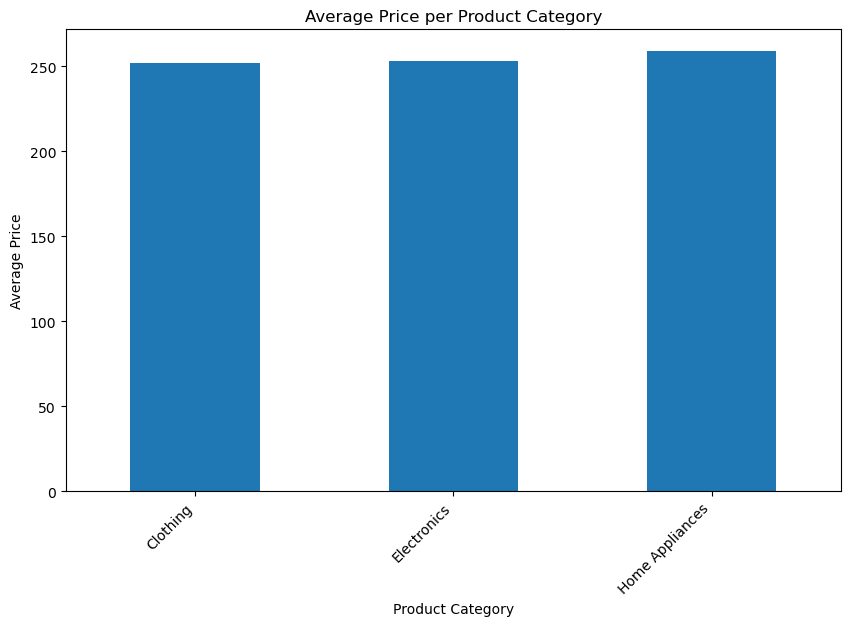

In [63]:
avg_price_per_category = df.groupby('Product Category')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar')
plt.title('Average Price per Product Category')
plt.ylabel('Average Price')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.show() 

# Are there significant price fluctuations based on size, color, or rating?
1. Price distribution by size/color 

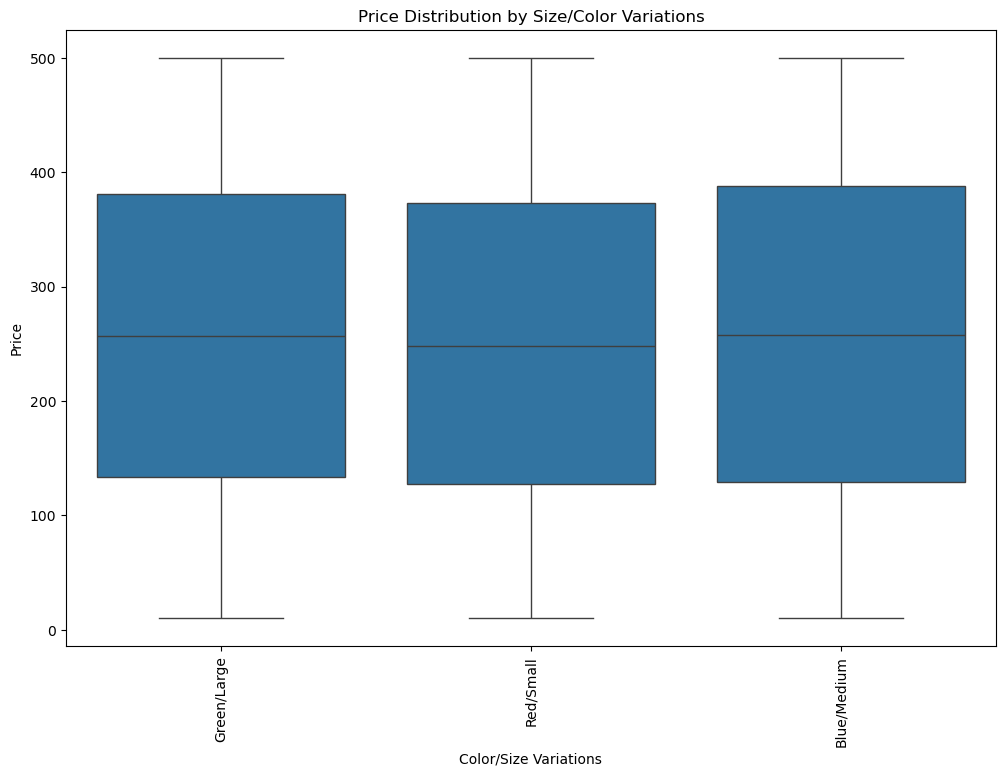

In [66]:
df['Color/Size Variations'] = df['Color/Size Variations'].astype(str)  # Make sure it's treated as a categorical variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='Color/Size Variations', y='Price', data=df)
plt.title('Price Distribution by Size/Color Variations')
plt.xticks(rotation=90)
plt.show() 

# Correlating rating and price for fluctuations

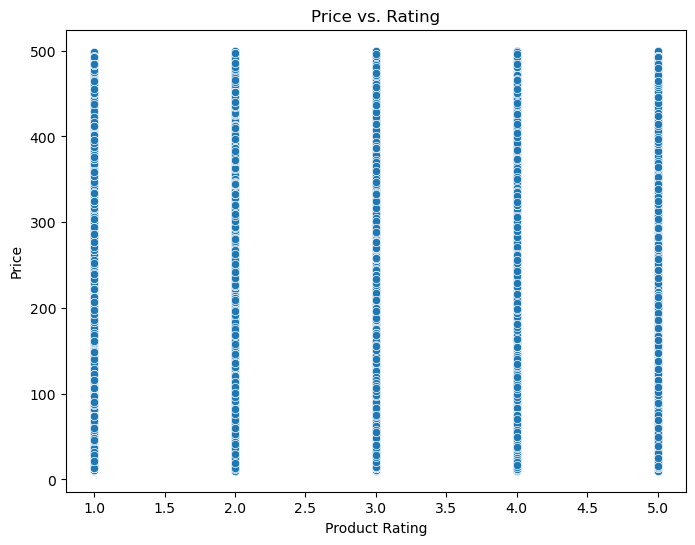

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Product Ratings', y='Price', data=df)
plt.title('Price vs. Rating')
plt.xlabel('Product Rating')
plt.ylabel('Price')
plt.show() 

# Which product categories have the highest and lowest average ratings?

In [73]:
avg_ratings_per_category = df.groupby('Product Category')['Product Ratings'].mean()
highest_rated_category = avg_ratings_per_category.idxmax()
lowest_rated_category = avg_ratings_per_category.idxmin()
print(f"Highest rated category: {highest_rated_category} with an average rating of {avg_ratings_per_category.max()}")
print(f"Lowest rated category: {lowest_rated_category} with an average rating of {avg_ratings_per_category.min()}")

Highest rated category: Clothing with an average rating of 3.0179586950014965
Lowest rated category: Electronics with an average rating of 2.982148170187444


 # Most common tags? 

In [76]:
df['Product Tags'] = df['Product Tags'].str.split(',')  # Assuming tags are separated by commas
tags_flat = df['Product Tags'].explode().value_counts()
print("Most common tags:")
print(tags_flat.head())

Most common tags:
Product Tags
DJF    6
O6L    5
WEC    5
CYV    4
XP6    4
Name: count, dtype: int64


# Average customer rating per product category?

In [95]:
avg_customer_rating_per_category = df.groupby('Product Category')['Product Ratings'].mean()
print("Average customer rating per product category:")
print(avg_customer_rating_per_category) 

Average customer rating per product category:
Product Category
Clothing           3.017959
Electronics        2.982148
Home Appliances    3.014251
Name: Product Ratings, dtype: float64


# Which products have the most variations (color/size)

In [86]:
df['Variation Count'] = df['Color/Size Variations'].apply(lambda x: len(x.split(',')))
most_variations = df[df['Variation Count'] == df['Variation Count'].max()]
print("Products with the most variations (color/size):")
print(most_variations[['Product ID', 'Product Name', 'Variation Count', 'Product Ratings']]) 


Products with the most variations (color/size):
     Product ID Product Name  Variation Count  Product Ratings
0      93TGNAY7       Laptop                1                2
1      TYYZ5AV7   Smartphone                1                2
2      5C94FGTQ   Headphones                1                1
3      XBHKYPQB      Monitor                1                1
4      728GCZFU       Laptop                1                4
...         ...          ...              ...              ...
9995   J29B6RDI   Headphones                1                1
9996   L1HL7437       Laptop                1                4
9997   FD57S4E1       Laptop                1                1
9998   RPYLOB1M   Headphones                1                1
9999   3JWTGTOM       Laptop                1                1

[10000 rows x 4 columns]


# Analyzing the impact of variations on ratings 

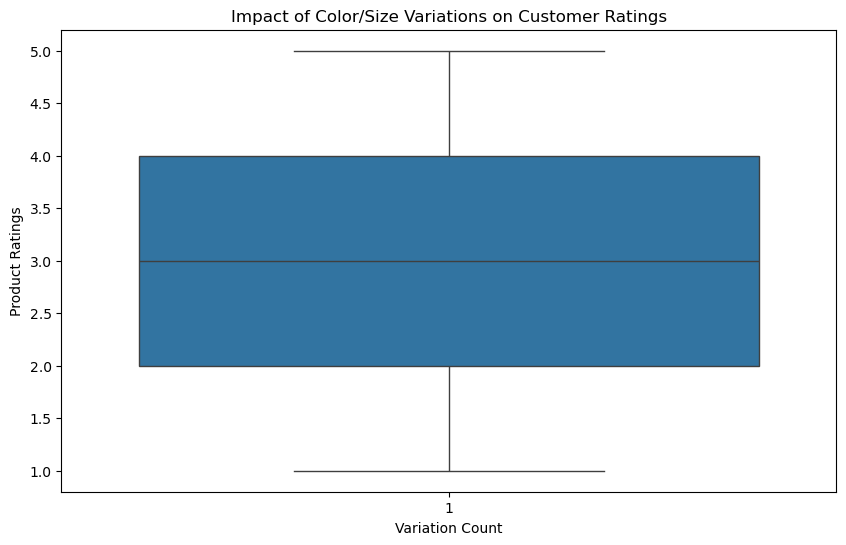

In [89]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation Count', y='Product Ratings', data=df)
plt.title('Impact of Color/Size Variations on Customer Ratings')
plt.show()